# Finding Insights from Data

### 📘 Notebook Overview: Finding Insights from Data

This notebook is dedicated to exploring the Adult Census dataset to uncover patterns and demographic insights related to income distribution. The workflow combines data cleaning and focused analysis to answer specific research questions. The following steps are included:

---

### ▪️ Import Required Packages  
Imports all necessary libraries for data manipulation, visualization, and exploratory analysis.

### ▪️ Combine Train and Test Files  
Merges the preprocessed training and test datasets to enable comprehensive exploration and insight generation from the full dataset.

### ▪️ Checking Number of Missing Values  
Counts and identifies missing values across all columns to determine the extent of data cleaning required.

### ▪️ Dropping Missing Values  
Removes rows with missing values to ensure cleaner analysis results.

### ▪️ Exploring Data  
Performs targeted analysis to address key questions:
- **Q1.1**: Which demographic groups are most likely to earn **more than 50K**?
- **Q1.2**: Which demographic groups are most likely to earn **50K or less**?
- **Q2**: What is the relationship between higher education and income?
- **Q3**: Are there gender disparities in income?
- **Q4**: What occupations are most associated with higher income?
- **Q5**: How do working hours relate to income?
- **Q6**: Income Distribution based of Government vs Non-Government Workclass
- **Q7**: Age and Income Relationship
- **Q8**: Capital Gain and Income Relationship

### ▪️ Summary: Characteristics of People Earning >50K vs ≤50K  
Summarizes the key traits and patterns found in the analysis to describe the general profiles of individuals earning above and below the $50K threshold.

---


## Import Required Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Combine Train and Test Files

In [2]:
# Load the original cleaned datasets
train_df = pd.read_csv("adult_combined_train_80.csv")
test_df = pd.read_csv("adult_combined_test_20.csv")

# Combine the datasets
df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

## Checking Number of Missing Values

In [3]:
df.isnull().sum()

age                  0
workclass         2753
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2763
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
income               0
dtype: int64

In [4]:
df.shape

(47984, 15)

## Dropping Missing Values

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
df.shape

(45221, 15)

# Exploring Data

## Q1.1: Demographic groups most likely to earn >$50K

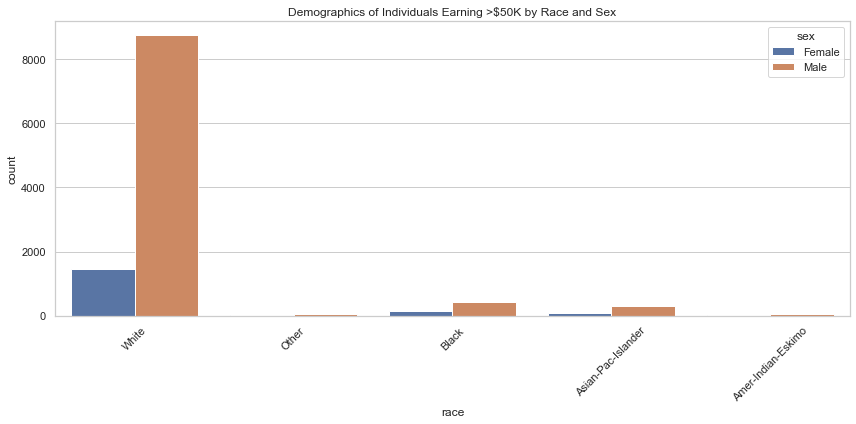

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['income'] == '>50K'], x='race', hue='sex')
plt.title("Demographics of Individuals Earning >$50K by Race and Sex")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 📊 Key Observations:

#### 1. **White Males Dominate the Higher Income Group**
- A significantly higher number of White males earn >$50K compared to all other demographic groups.
- This indicates a strong correlation between being White and male and higher income levels in the dataset.

#### 2. **Gender Disparity Within Racial Groups**
- In every racial category, males outnumber females in the higher income bracket.
- Even among White individuals, females earn less frequently above $50K than males, despite being the most represented female group.

#### 3. **Minority Group**
- Black, Asian-Pac-Islander, Amer-Indian-Eskimo, and Other racial groups show a much lower count of individuals earning >$50K.
- Among minorities, Asian-Pac-Islander and Black males have slightly higher earnings representation, but still much lower than White males.

#### 4. **Underrepresentation of Females Across All Races**
- Across all racial groups, females make up a small portion of individuals earning >$50K.


Overall, the chart highlights significant income disparities based on race and gender, with White males being the most dominant high-income demographic.

## Q1.2: Demographic groups most likely to earn <=$50K

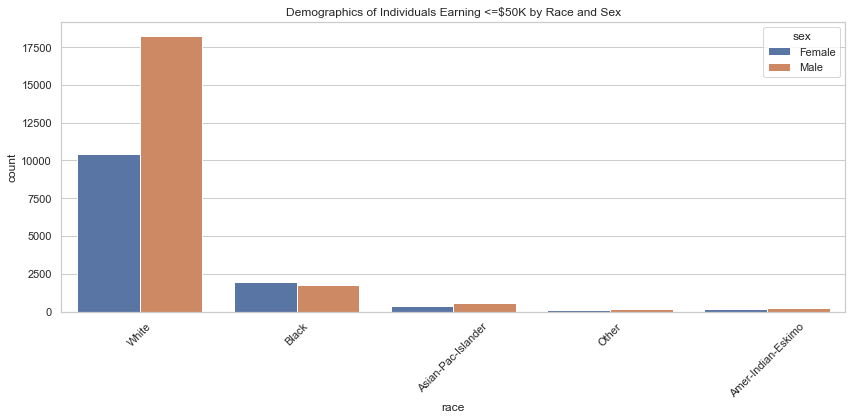

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['income'] == '<=50K'], x='race', hue='sex')
plt.title("Demographics of Individuals Earning <=$50K by Race and Sex")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 📊 Key Observations: 

#### 1. **White Individuals Form the Majority of Lower-Income Group**
- Both **White males and females** make up the **largest portion** of individuals earning ≤50K.
- The female count is significantly higher in this bracket compared to the >50K group.

#### 2. **Greater Gender Balance Among Lower Earners**
- The **gender gap is smaller** in the ≤50K group compared to the >50K group.
- Males still outnumber females in most races.

#### 3. **Minority Racial Groups Are More Equally Represented**
- **Black males and females** show similar counts in this income range, reflecting a more **balanced gender distribution** within that group.
- **Asian-Pac-Islander**, **Amer-Indian-Eskimo**, and **Other** groups have **low overall counts**, but representation is visible in both genders.

#### 4. **Females Are Predominantly in the Lower-Income Group**
- Compared to the >50K chart, this plot shows that **females are far more represented** in the ≤50K group.
- This supports the broader observation of a **gender-based income gap**.


Overall, the ≤$50K group displays **more racial and gender diversity**, especially in comparison to the higher-income bracket. However, females and minorities are **concentrated in lower-income brackets**.


## Q2: Higher education vs income

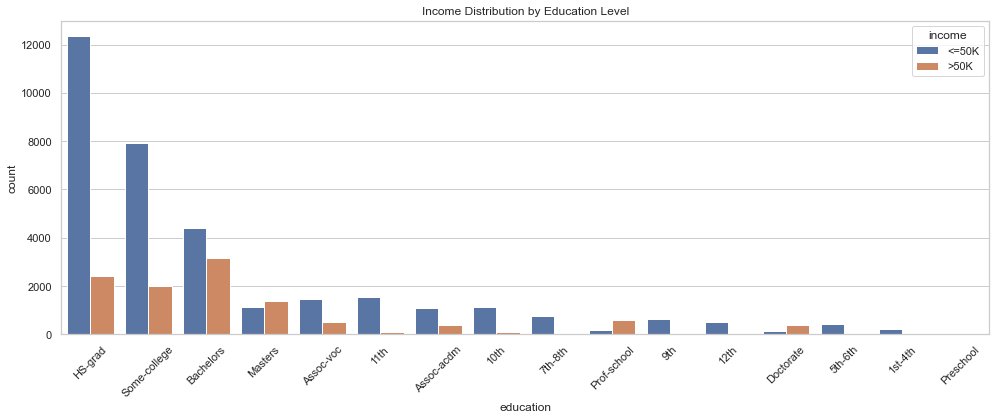

In [10]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.title("Income Distribution by Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 📊 Key Observations:

#### 1. **Higher Education Generally Leads to Higher Income**
- Individuals with Master's, Professional School, and Doctorate degrees have a higher proportion of >$50K earners compared to lower education levels.
- Bachelor’s degree holders show almost a balanced distribution but higher degrees like Master’s and Doctorate show more toward to higher income.

#### 2. **Lower Education Levels Are Dominated by less than or equal to 50K Income**
- Most individuals with education levels such as HS-grad, Some-college, Associate degrees, and below tend to earn less than or equal to $50K.

In conclusion, the data supports the notion that increased education correlates positively with income, with higher degrees offering a greater likelihood of earning above $50K annually.

## Q3: Gender disparities in income

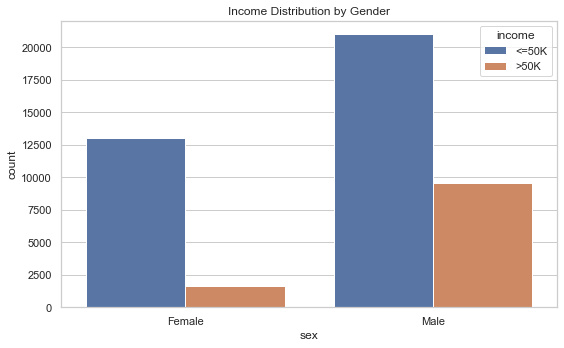

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='income')
plt.title("Income Distribution by Gender")
plt.tight_layout()
plt.show()

Total Number of Individuals by Gender:
 sex
Male      30526
Female    14695
Name: count, dtype: int64 

Income Counts by Gender:
 income  <=50K  >50K
sex                
Female  13026  1669
Male    20987  9539 

Proportion of Income by Gender:
 income     <=50K      >50K
sex                       
Female  0.886424  0.113576
Male    0.687512  0.312488 



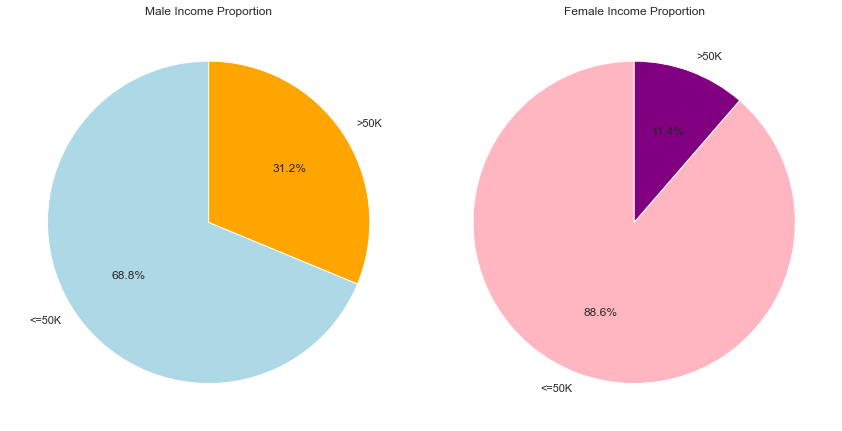

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count total number of males and females
gender_counts = df['sex'].value_counts()

# Count of income categories per gender
gender_income_counts = df.groupby(['sex', 'income']).size().unstack()

# Proportion of income levels within each gender
gender_income_proportions = gender_income_counts.div(gender_income_counts.sum(axis=1), axis=0)

# Print results
print("Total Number of Individuals by Gender:\n", gender_counts, "\n")
print("Income Counts by Gender:\n", gender_income_counts, "\n")
print("Proportion of Income by Gender:\n", gender_income_proportions, "\n")

# Plot pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male pie chart
axes[0].pie(
    gender_income_proportions.loc['Male'],
    labels=gender_income_proportions.columns,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'orange']
)
axes[0].set_title("Male Income Proportion")

# Female pie chart
axes[1].pie(
    gender_income_proportions.loc['Female'],
    labels=gender_income_proportions.columns,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightpink', 'purple']
)
axes[1].set_title("Female Income Proportion")

plt.tight_layout()
plt.show()

#### 📊 Key Observations:

#### **Income Distribution by Gender**

- This plot compares income levels between males and females, highlighting potential gender disparities in earnings. The following insight is observed:

#### **Overall Income Disparity by Gender**
- Even in both gender, the proportion of earning lower than or equal to 50K is demonating, the proportion of male is almost three times more likely to earn above $50K than women in this dataset, highlighting a clear gender disparity in income.


## Q4: Occupation types order

### In Income >50K

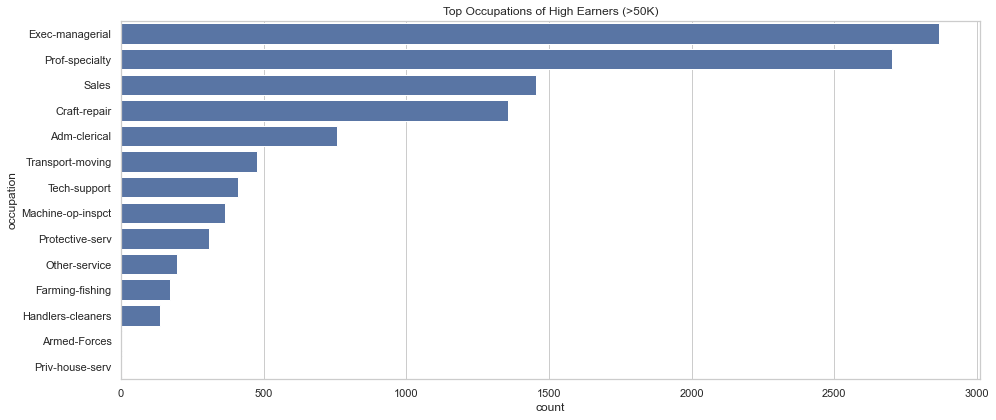

In [13]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df[df['income'] == '>50K'], y='occupation', order=df[df['income'] == '>50K']['occupation'].value_counts().index)
plt.title("Top Occupations of High Earners (>50K)")
plt.tight_layout()
plt.show()


### In Income <=50K

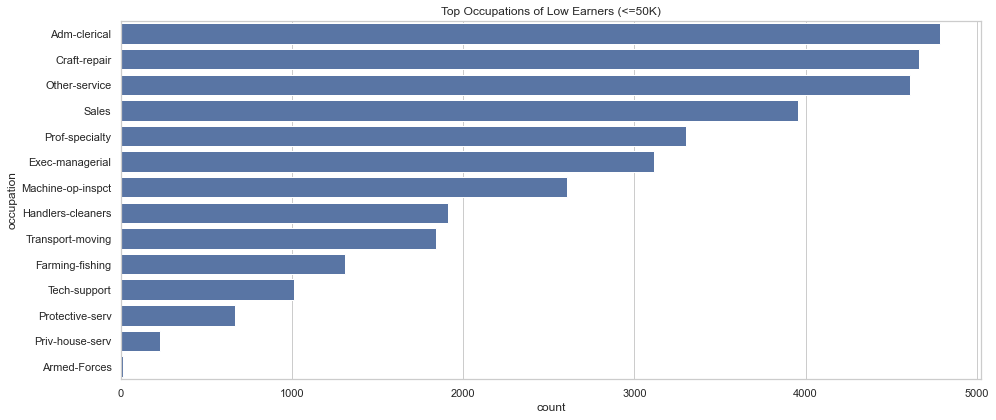

In [14]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df[df['income'] == '<=50K'], y='occupation', order=df[df['income'] == '<=50K']['occupation'].value_counts().index)
plt.title("Top Occupations of Low Earners (<=50K)")
plt.tight_layout()
plt.show()

#### 📊 Key Observations:

#### 1. High Earners (>50K)
- The most common occupations among individuals earning more than $50K are Exec-managerial, Prof-specialty, and Sales.

#### 2. Low Earners (<=50K)
- In contrast, the top occupations for those earning $50K or less include Adm-clerical, Craft-repair, and Other-service.


## Q5: Working hours vs income

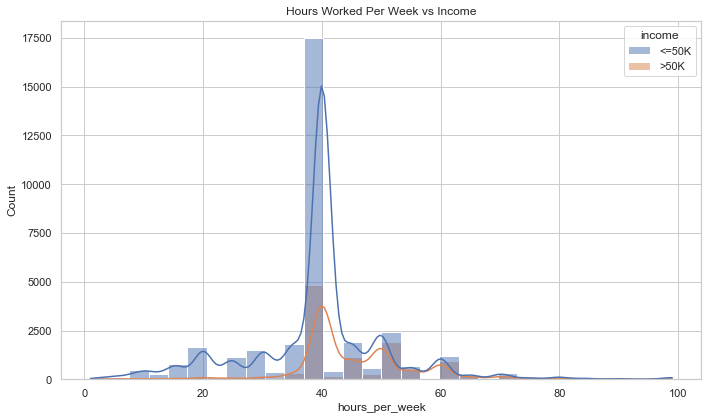

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hours_per_week', hue='income', kde=True, bins=30)
plt.title("Hours Worked Per Week vs Income")
plt.tight_layout()
plt.show()

In [16]:
# Total number of people by income group
income_counts = df['income'].value_counts()
print("Total number of individuals by income group:\n", income_counts, "\n")

# Summary statistics of hours worked per income group
income_hours_distribution = df.groupby('income')['hours_per_week'].describe()
print("Proportion of working hours per week for each income group:\n", income_hours_distribution, "\n")


Total number of individuals by income group:
 income
<=50K    34013
>50K     11208
Name: count, dtype: int64 

Proportion of working hours per week for each income group:
           count       mean        std  min   25%   50%   75%   max
income                                                            
<=50K   34013.0  39.372005  11.974303  1.0  37.0  40.0  40.0  99.0
>50K    11208.0  45.690489  10.797764  1.0  40.0  40.0  50.0  99.0 



#### 📊 Key Observations:

#### 1. **Most Individuals Work Around 40 Hours per Week**
- There is a peak at 40 hours in both ≤50K and >50K income.
- This aligns with the standard full-time work per week, explaining the high concentration.

#### 2. **Higher Earners (>50K) Tend to Work Longer Hours**
- Although many higher earners also work around 40 hours, there is a **noticeable spread between 45 and 55 hours**, indicating a tendency to work more.
- This suggests that longer working hours may be correlated with higher income.
   

While 40 hours per week is common across both income groups, higher earners are more likely to work beyond that, especially in the 45–55 hour range. This trend supports the notion that increased working hours can be associated with higher income, though not all high earners exceed the standard work week.


## Q6: Income Distribution based of Government vs Non-Government Workclass

<ipython-input-17-2c059bd3efee>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


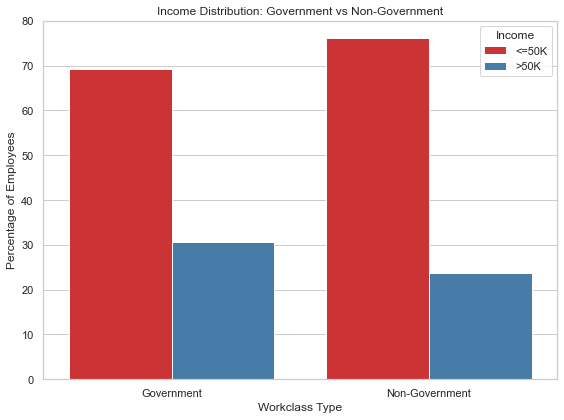

In [17]:
# Clean and prepare data again, if needed
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Classify workclass as 'Government' or 'Non-Government'
gov_classes = ["Federal-gov", "State-gov", "Local-gov"]
df["workclass_type"] = df["workclass"].apply(lambda x: "Government" if x in gov_classes else "Non-Government")

# Group and count income categories
income_dist = (
    df.groupby(["workclass_type", "income"])
    .size()
    .reset_index(name="count")
)


# Normalize to percentages using transform for index alignment
income_dist["percent"] = (
    income_dist["count"] / income_dist.groupby("workclass_type")["count"].transform("sum") * 100
)


# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=income_dist,
    x="workclass_type",
    y="percent",
    hue="income",
    palette="Set1"
)
plt.title("Income Distribution: Government vs Non-Government")
plt.ylabel("Percentage of Employees")
plt.xlabel("Workclass Type")
plt.legend(title="Income")
plt.tight_layout()
plt.show()


#### 📊 Key Observation
- A higher percentage of government employees earn >50K compared to non-government employees, although in both sectors the majority earn ≤50K.


## Q7: Age and Income Relationship

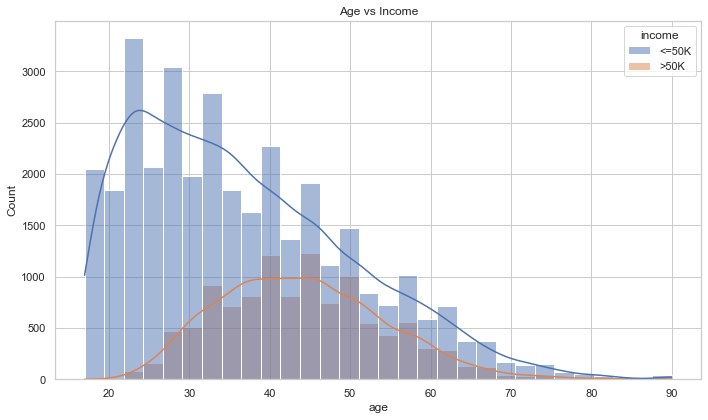

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='income', kde=True, bins=30)
plt.title("Age vs Income")
plt.tight_layout()
plt.show()

#### 📊 Key Observation
- Individuals earning >50K are generally older, with counts peaking between 35–55 years, whereas those earning ≤50K are mostly younger, concentrated between 20–35 years.


## Q8: Capital Gain and Income Relationship

In [24]:
# Group by income and check mean and median of capital gain
capital_gain_stats = df.groupby('income')['capital_gain'].agg(['mean', 'median', 'max', 'min'])
print("\nCapital Gain Stats by Income Group:")
print(capital_gain_stats)

# Check percentage of people with non-zero capital gain in each income group
non_zero_gain = df[df['capital_gain'] > 0].groupby('income').size()
total_count = df.groupby('income').size()

percentage_non_zero = (non_zero_gain / total_count * 100).fillna(0)
print("\nPercentage of people with non-zero capital gain by income group:")
print(percentage_non_zero)



Capital Gain Stats by Income Group:
               mean  median    max  min
income                                 
<=50K    149.027783     0.0  41310    0
>50K    3991.791667     0.0  99999    0

Percentage of people with non-zero capital gain by income group:
income
<=50K     4.160174
>50K     21.190221
dtype: float64


#### Key Observations
- The **average capital gain** for individuals earning >50K is significantly higher (**~3992**) compared to those earning ≤50K (**~149**).
- However, the **median capital gain** is **0** for both income groups, indicating that most individuals have no capital gain.
- About **21%** of individuals earning **>50K** have **non-zero capital gain**, whereas only **~4%** of those earning **≤50K** have any capital gain.
- This suggests that **having capital gains is more common among higher-income individuals**, but the majority of people in both groups do not have capital gains.


## Summary: Characteristics of People Earning >50K vs ≤50K

---

### Individuals Earning >$50K

#### 📌 Demographics & Gender
- **White males** dominate this group by a significant margin.
- Across **all racial groups**, **males earn more** than females.
- Minorities (e.g., Black, Asian-Pac-Islander, Amer-Indian-Eskimo) are **underrepresented**, but when present, they are more often **male**.

#### 🎓 Education
- Higher earners typically have **Bachelor’s degrees or higher** (Master’s, Doctorate).
- There’s a clear upward trend in income with increasing education level.

#### 🧑‍💼 Occupation & Workclass
- Common occupations: **Exec-managerial**, **Prof-specialty**, **Sales**.
- These roles are often tied to **private sector or self-employment** in better-paying positions. 
- In **both Government and Non-Government** sectors, the majority earn **≤50K**.  
- However, **Government workers** have a **higher percentage** earning **>50K** compared to Non-Government workers.

#### ⏱️ Working Hours
- Tend to work **more than 40 hours/week**, with many working **50–60 hours** or more.
- Suggests higher income may be linked to **longer work commitment or multiple jobs**.

#### 💸 Capital Gain
- This group often shows **non-zero capital gains**, implying income sources beyond wages (e.g., investments).

#### 📈 Age Distribution 
- People earning **>50K** are typically **older**, with the highest counts between **35–55 years**.  
- Income levels **increase with age** up to around **50 years**, then gradually decline.

---

### Individuals Earning ≤$50K

#### 📌 Demographics & Gender
- Still dominated by **White individuals**, but with a **much higher proportion of females** compared to the >$50K group.
- Minority representation is **higher**, with a **more balanced gender split** among Black and Other groups.

#### 🎓 Education
- Majority have **HS-grad**, **Some-college**, or **lower education** (11th grade or less).
- Advanced degrees are **rare** in this income group.

#### 🧑‍💼 Occupation & Workclass
- Often in **lower-paying jobs** such as **Handlers-cleaners**, **Machine operators**, or **Service roles**.
- **Public sector**, **unemployed**, or **low-skill private sector** roles are more common.
- A significantly larger share of **Non-Government** workers earn **≤50K** compared to Government workers.

#### ⏱️ Working Hours
- Most individuals work around the **standard 40 hours/week**, but some work **fewer hours**, possibly part-time.

#### 💸 Capital Gain
- Typically have **zero or very low capital gain**, suggesting **income solely from wages**.

#### 📈 Age Distribution 
- The majority of individuals earning **≤50K** are **younger**, especially concentrated between **20–35 years old**.  
- After **35 years**, the proportion steadily declines.

---

### Overall Insight
- Income disparity is driven by a combination of **gender, race, education, hours worked, age, and job type**.
- Those earning >50K tend to be **well-educated White males**, working long hours in **skilled or managerial roles**, often with **investment income**, and typically **middle-aged (35–55 years)**.
- Those earning ≤50K are more **diverse in gender and race**, often **younger**, with **lower education levels**, in **manual or service jobs**, and fewer working hours.
